<div align="right" dir="auto">
   
#  دیتاست اول(COVID)
 </div>
  


<div align="right" dir="auto">
   
##  اتصال به کلاستر اسپارک و هدوپ 

    در این قسمت از تمرین باید به عنوان درایور یک سسشن  به کلاستر اسپارک بسازیم.
 </div>
  
* **appName**: application name displayed at the Spark Master Web UI;
* **master**: Spark Master URL, same used by Spark Workers;
* **spark.executor.memory**: must be less than or equals to docker compose SPARK_WORKER_MEMORY config.

In [5]:
!pip install pyspark==3.1.1
import matplotlib.pyplot as plt
import pyspark
from pyspark.sql import SparkSession
import os
import pandas
from pyspark.sql.types import *
print(pyspark.__version__)


3.1.1


In [4]:
spark.stop()

NameError: name 'spark' is not defined

In [13]:
print(pyspark.__version__)

spark = SparkSession.builder.appName('spark-notebook-1').master('spark://spark-master:7077').config('spark.executor.memmory', '2G').getOrCreate()
spark

3.1.1



<div align="right" dir="auto">
   
#  خواندن داده 

    :در اسپارک ما ساختارهای مختلفی برای کار با داده و پخش شدن آن‌ها در شبکه داریم که به ۳ دسته تقسیم بندی میشوند 
+ RDD
+ Dataset
+ DataFrame
    
    
     برای مطالعه بیشتر به لینک زیر مراجعه کنید:
[rdd-vs-dataframe-vs-dataset](https://phoenixnap.com/kb/rdd-vs-dataframe-vs-dataset)

    ما در درس با ساختار RDD آشنا شدیم حال در این تمرین میخواهیم با ساختار Dataframe آشنا شویم و به کمک آن دیتا را از روی HDFS بخوانیم و روی آن فایل‌ها پردازش انجام دهیم
 
 </div>
  
    

In [14]:
# The data from covid.csv will be loaded from a local file path
for path, subdirs, files in os.walk('./data/'):
    for name in files:
        if "covid" in name:
            csvName = name
            csvPath = os.path.join(path, name)
            print("Loading data from csv {}".format(csvPath))
            covidDfPandas = pandas.read_csv(csvPath)
covidDfPandas

Loading data from csv ./data/covid.csv
Loading data from csv ./data/.ipynb_checkpoints/covid-checkpoint.csv


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
...,...,...,...,...,...,...,...,...,...,...,...,...
61895,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61896,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61897,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61898,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [15]:
# Structure of data in the DataFrame
schema = StructType([
    StructField("dateRep", StringType(), True),
    StructField("day", IntegerType(), True),
    StructField("month", IntegerType(), True),
    StructField("year", IntegerType(), True),
    StructField("cases", IntegerType(), True),
    StructField("deaths", IntegerType(), True),
    StructField("countriesAndTerritories", StringType(), True),
    StructField("geoId", StringType(), True),
    StructField("countryterritoryCode", StringType(), True),
    StructField("popData2019", FloatType(), True),
    StructField("continentExp", StringType(), True),
    StructField("Cumulative_number_for_14_days_of_COVID-19_cases_per_100000", DoubleType(), True),
])


<div align="right" dir="auto">
یک DataFrame از Pandas را به یک DataFrame از Spark تبدیل کنید و سپس طرح ساختاری و برخی از داده‌ها را نمایش دهید.
 </div>
  
    




In [16]:
# Convert Pandas DataFrame to Spark DataFrame with defined schema
covidDfSpark = spark.createDataFrame(covidDfPandas.values.tolist(), schema=schema)

# Show the DataFrame schema and some data
covidDfSpark.printSchema()
covidDfSpark.show()

root
 |-- dateRep: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- cases: integer (nullable = true)
 |-- deaths: integer (nullable = true)
 |-- countriesAndTerritories: string (nullable = true)
 |-- geoId: string (nullable = true)
 |-- countryterritoryCode: string (nullable = true)
 |-- popData2019: float (nullable = true)
 |-- continentExp: string (nullable = true)
 |-- Cumulative_number_for_14_days_of_COVID-19_cases_per_100000: double (nullable = true)



2024-01-13 14:27:43,130 WARN scheduler.TaskSetManager: Stage 7 contains a task of very large size (1650 KiB). The maximum recommended task size is 1000 KiB.


+----------+---+-----+----+-----+------+-----------------------+-----+--------------------+-----------+------------+----------------------------------------------------------+
|   dateRep|day|month|year|cases|deaths|countriesAndTerritories|geoId|countryterritoryCode|popData2019|continentExp|Cumulative_number_for_14_days_of_COVID-19_cases_per_100000|
+----------+---+-----+----+-----+------+-----------------------+-----+--------------------+-----------+------------+----------------------------------------------------------+
|14/12/2020| 14|   12|2020|  746|     6|            Afghanistan|   AF|                 AFG|3.8041756E7|        Asia|                                                9.01377925|
|13/12/2020| 13|   12|2020|  298|     9|            Afghanistan|   AF|                 AFG|3.8041756E7|        Asia|                                                7.05277624|
|12/12/2020| 12|   12|2020|  113|    11|            Afghanistan|   AF|                 AFG|3.8041756E7|        Asia|    


<div align="right" dir="auto">
   
#  اسپارک SQL 

    مهمترین قابلیت اسپارک این است که می‌تواند با خواندن فایل‌ها به صورت توزیع شده روی آن‌ها پردازش انجام دهد و این پردازش را برنامه ‌نویس میتواند با استفاده از دستورات SQL اعمال کند
    در این بخش از شما انتظار می‌رود که به وسیله spark SQL  به اسپارک کوئری  بزنید . 
    
    
 </div>

[pyspark.sql.functions.col](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.col.html)

[pyspark.sql.DataFrame.count](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.count.html)

[pyspark.sql.DataFrame.filter](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.filter.html)

[pyspark.sql.DataFrame.groupBy](https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.DataFrame.groupBy.html)

<div align="right" dir="auto">
برای اینکه بتوانیم روی دیتای لود شده به وسیله تابع  spark.sql
    کوئری‌های SQL بزنیم
    باید دو دیتاست لود شده را به عنوان table
    به spark 
    معرفی کنیم
</div>

In [17]:
covidDfSpark.registerTempTable("covid")

<div align="right" dir="auto">
 ده رکورد آخر را نمایش دهید
</div>

In [18]:
# to-do
covidDfSpark.tail(10)
spark.sql("""SELECT * FROM covid ORDER BY dateRep DESC LIMIT 10""").show()

2024-01-13 14:28:57,779 WARN scheduler.TaskSetManager: Stage 8 contains a task of very large size (1687 KiB). The maximum recommended task size is 1000 KiB.
2024-01-13 14:28:58,721 WARN scheduler.TaskSetManager: Stage 9 contains a task of very large size (1650 KiB). The maximum recommended task size is 1000 KiB.


+----------+---+-----+----+-----+------+-----------------------+-----+--------------------+------------+------------+----------------------------------------------------------+
|   dateRep|day|month|year|cases|deaths|countriesAndTerritories|geoId|countryterritoryCode| popData2019|continentExp|Cumulative_number_for_14_days_of_COVID-19_cases_per_100000|
+----------+---+-----+----+-----+------+-----------------------+-----+--------------------+------------+------------+----------------------------------------------------------+
|31/12/2019| 31|   12|2019|    0|     0|             Luxembourg|   LU|                 LUX|    613894.0|      Europe|                                                       NaN|
|31/12/2019| 31|   12|2019|    0|     0|                 Norway|   NO|                 NOR|   5328212.0|      Europe|                                                       NaN|
|31/12/2019| 31|   12|2019|    0|     0|               Malaysia|   MY|                 MYS| 3.1949788E7|        Asi

<div align="right" dir="auto">
اسکیما یا ساختار دیتاست ها را نمایش دهید

</div>

In [19]:
# to-do
db_name = spark.catalog.currentDatabase()
spark.sql(f"DESCRIBE covid").show()

+--------------------+---------+-------+
|            col_name|data_type|comment|
+--------------------+---------+-------+
|             dateRep|   string|   null|
|                 day|      int|   null|
|               month|      int|   null|
|                year|      int|   null|
|               cases|      int|   null|
|              deaths|      int|   null|
|countriesAndTerri...|   string|   null|
|               geoId|   string|   null|
|countryterritoryCode|   string|   null|
|         popData2019|    float|   null|
|        continentExp|   string|   null|
|Cumulative_number...|   double|   null|
+--------------------+---------+-------+



In [20]:
covidDfSpark.printSchema()

root
 |-- dateRep: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- cases: integer (nullable = true)
 |-- deaths: integer (nullable = true)
 |-- countriesAndTerritories: string (nullable = true)
 |-- geoId: string (nullable = true)
 |-- countryterritoryCode: string (nullable = true)
 |-- popData2019: float (nullable = true)
 |-- continentExp: string (nullable = true)
 |-- Cumulative_number_for_14_days_of_COVID-19_cases_per_100000: double (nullable = true)



<div align="right" dir="auto">
داده‌های مربوط به ستون   countryterritoryCode ,deaths را پرینت کنید(۱۰تا) 

</div>

In [25]:
# to-do
spark.sql("""SELECT deaths, countryterritoryCode FROM covid LIMIT 10""").show()

+------+--------------------+
|deaths|countryterritoryCode|
+------+--------------------+
|     1|                 KAZ|
|     1|                 KAZ|
|     8|                 KAZ|
|     0|                 KAZ|
|     4|                 KAZ|
|     6|                 KAZ|
|    68|                 KAZ|
|    34|                 KAZ|
|     0|                 KAZ|
|     0|                 KAZ|
+------+--------------------+



2024-01-13 14:30:40,015 WARN scheduler.TaskSetManager: Stage 19 contains a task of very large size (1650 KiB). The maximum recommended task size is 1000 KiB.


<div align="right" dir="auto">
تعداد کل موارد Covid برابر است با?
</div>

In [26]:
# to-do
result = spark.sql("SELECT SUM(cases) AS sum_of_case FROM covid").show()


+-----------+
|sum_of_case|
+-----------+
|   71503614|
+-----------+



2024-01-13 14:31:32,094 WARN scheduler.TaskSetManager: Stage 21 contains a task of very large size (1650 KiB). The maximum recommended task size is 1000 KiB.


<div align="right" dir="auto">
مجموع موارد کروناویروس در اکتبر ۲۰۲۰ در بلژیک را به دست آورید.
</div>



In [27]:
# to-do
result = spark.sql("""
                    SELECT SUM(cases) AS  TotalCases
                    FROM covid
                    WHERE countriesAndTerritories = 'Belgium' AND month = 10 AND year = 2020
                    """).show()

2024-01-13 14:31:43,670 WARN scheduler.TaskSetManager: Stage 23 contains a task of very large size (1650 KiB). The maximum recommended task size is 1000 KiB.


+----------+
|TotalCases|
+----------+
|    320023|
+----------+




<div align="right" dir="auto">
جمع تعداد موارد و مرگ‌ها در کشورهای آسیا به دست آورید.
 
 </div>


In [28]:
# to-do
result = spark.sql("""
                        SELECT 
                          countriesAndTerritories as country,
                          SUM(cases) AS TotalCases,
                          SUM(deaths) AS TotalDeaths
                          FROM covid
                          WHERE  continentExp = 'Asia'
                          GROUP BY countriesAndTerritories
                          ORDER BY country""").show()

2024-01-13 14:32:29,369 WARN scheduler.TaskSetManager: Stage 25 contains a task of very large size (1650 KiB). The maximum recommended task size is 1000 KiB.


+-----------------+----------+-----------+
|          country|TotalCases|TotalDeaths|
+-----------------+----------+-----------+
|      Afghanistan|     49273|       1971|
|          Bahrain|     89143|        348|
|       Bangladesh|    490533|       7052|
|           Bhutan|       438|          0|
|Brunei_Darussalam|       152|          3|
|         Cambodia|       359|          0|
|            China|     92021|       4739|
|            India|   9884100|     143355|
|        Indonesia|    617820|      18819|
|             Iran|   1108269|      52196|
|             Iraq|    574634|      12579|
|           Israel|    357859|       2999|
|            Japan|    179653|       2585|
|           Jordan|    259614|       3365|
|       Kazakhstan|    186277|       2552|
|           Kuwait|    146218|        911|
|       Kyrgyzstan|     77674|       1312|
|             Laos|        41|          0|
|          Lebanon|    146520|       1200|
|         Malaysia|     83475|        415|
+----------


<div align="right" dir="auto">
میانگین تعداد موارد و مرگ‌ها در کشورهای آسیا به دست آورید.
 
 </div>


In [29]:
# to-do
result = spark.sql("""
                        SELECT 
                          countriesAndTerritories as country,
                          AVG(cases) AS Average_of_Cases,
                          AVG(deaths) AS Average_of_Deaths
                          FROM covid
                          WHERE  continentExp = 'Asia'
                          GROUP BY country ORDER BY country""").show(10)

2024-01-13 14:32:42,602 WARN scheduler.TaskSetManager: Stage 27 contains a task of very large size (1650 KiB). The maximum recommended task size is 1000 KiB.


+-----------------+------------------+--------------------+
|          country|  Average_of_Cases|   Average_of_Deaths|
+-----------------+------------------+--------------------+
|      Afghanistan| 144.9205882352941|   5.797058823529412|
|          Bahrain| 255.4240687679083|   0.997134670487106|
|       Bangladesh|1783.7563636363636|  25.643636363636364|
|           Bhutan|1.5869565217391304|                 0.0|
|Brunei_Darussalam|0.5448028673835126|0.010752688172043012|
|         Cambodia|1.0527859237536656|                 0.0|
|            China|262.91714285714284|               13.54|
|            India|28321.203438395416|  410.75931232091693|
|        Indonesia|1801.2244897959183|   54.86588921282799|
|             Iran| 3166.482857142857|  149.13142857142856|
+-----------------+------------------+--------------------+
only showing top 10 rows




<div align="right" dir="auto">
جمع مرگ‌های کووید در اروپا بر اساس تاریخ به دست آورید.
 
 </div>

In [30]:
# to-do
result = spark.sql("""
                        SELECT 
                          dateRep,
                          SUM(deaths) AS TotalDeaths
                          FROM covid
                          WHERE  continentExp = 'Europe'
                          GROUP BY dateRep ORDER BY TotalDeaths DESC""").show(10)

2024-01-13 14:33:27,590 WARN scheduler.TaskSetManager: Stage 29 contains a task of very large size (1650 KiB). The maximum recommended task size is 1000 KiB.


+----------+-----------+
|   dateRep|TotalDeaths|
+----------+-----------+
|25/11/2020|       6391|
|02/12/2020|       6195|
|09/12/2020|       6074|
|28/11/2020|       6001|
|21/11/2020|       5909|
|18/11/2020|       5829|
|05/12/2020|       5783|
|03/12/2020|       5728|
|26/11/2020|       5719|
|04/12/2020|       5716|
+----------+-----------+
only showing top 10 rows




<div align="right" dir="auto">
   
#  اسپارک toPandas 

    یکی ار قابلیت‌های اسپارک این است که می‌توان dataframe های آن را به 
    dataframe های pandas تبدیل کند و از توابع آن از جمله
    توابع plot  آن برای رسم نمودار استفاده کرد.
    در این قسمت از شما انتظار می‌رود نمودار تعداد جنگ‌ها بر اساس هر گونه را رسم کنید.
    
 </div>
  
    

  
[pyspark.sql.DataFrame.toPandas](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.toPandas.html)

[pyspark.pandas.DataFrame.plot](https://spark.apache.org/docs/3.2.1/api/python/reference/pyspark.pandas/api/pyspark.pandas.DataFrame.plot.html)



<div align="right" dir="auto">
جمع موارد و مرگ‌ها برای هر قاره را به دست آورید.
 
 </div>

2024-01-13 14:33:51,792 WARN scheduler.TaskSetManager: Stage 31 contains a task of very large size (1650 KiB). The maximum recommended task size is 1000 KiB.


+------------+------+
|continentExp| count|
+------------+------+
|      Europe|479789|
|      Africa| 56334|
|       Other|     7|
|     Oceania|  1154|
|        Asia|290129|
|     America|785420|
+------------+------+



2024-01-13 14:33:52,961 WARN scheduler.TaskSetManager: Stage 41 contains a task of very large size (1650 KiB). The maximum recommended task size is 1000 KiB.


<Axes: ylabel='continentExp'>

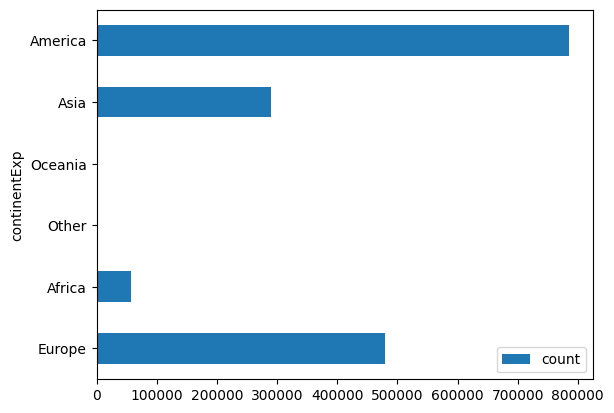

In [31]:
# to-do

result = spark.sql("""
                        SELECT 
                          continentExp,
                          SUM(deaths) AS count
                          FROM covid
                          GROUP BY continentExp""")
result.show()
pandaDf = result.toPandas()
pandaDf.plot.barh(x='continentExp', y='count')

<div align="right" dir="auto">
نمودار مبتلایان در طور زمان را برای کشور ایران را بنویسید. 
    
 </div>
  

2024-01-13 14:35:17,311 WARN scheduler.TaskSetManager: Stage 43 contains a task of very large size (1650 KiB). The maximum recommended task size is 1000 KiB.


+----------+-----------+
|   dateRep|total_cases|
+----------+-----------+
|04/12/2020|      13922|
|05/11/2020|       8452|
|23/11/2020|      13053|
|02/11/2020|       7719|
|28/03/2020|       2926|
|19/01/2020|          0|
|07/03/2020|       1234|
|25/02/2020|         18|
|04/01/2020|          0|
|08/11/2020|       9450|
|15/01/2020|          0|
|13/02/2020|          0|
|18/01/2020|          0|
|01/03/2020|        205|
|06/01/2020|          0|
|17/08/2020|       2133|
|05/07/2020|       2449|
|24/08/2020|       2113|
|04/08/2020|       2598|
|07/02/2020|          0|
+----------+-----------+
only showing top 20 rows



2024-01-13 14:35:17,793 WARN scheduler.TaskSetManager: Stage 49 contains a task of very large size (1650 KiB). The maximum recommended task size is 1000 KiB.


<Axes: xlabel='dateRep', ylabel='total_cases'>

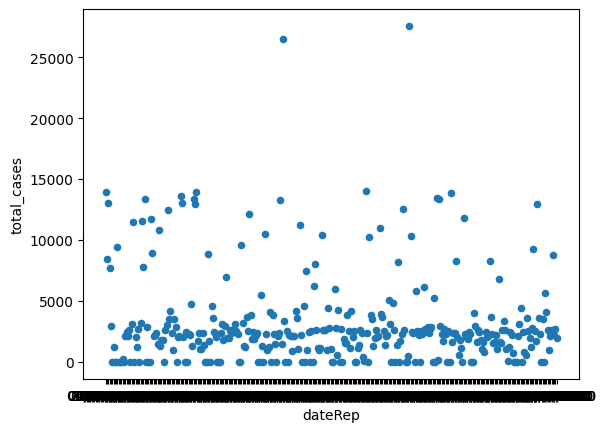

In [32]:
# to-do 
import pandas as pd
import pyspark.sql as sparksql
result = spark.sql("""
                        SELECT 
                          dateRep,
                          SUM(cases) AS total_cases
                          FROM covid
                          WHERE countriesAndTerritories="Iran"
                          GROUP BY dateRep
                          """)

result.show()
pandaDf = result.toPandas()
pandaDf.plot.scatter(x='dateRep', y='total_cases')


In [33]:
# Assuming you have a DataFrame named covidDfSpark
iran_cases_2020.select('date').show(20)

NameError: name 'iran_cases_2020' is not defined


<div align="right" dir="auto">
   
#  اسپارک Shuffle 

    Spark SQL shuffle مکانیزمی است برای توزیع مجدد یا پارتیشن بندی مجدد داده ها به طوری که داده ها به طور متفاوت در پارتیشن ها گروه بندی می شوند، بر اساس اندازه داده شما ممکن است نیاز باشد تعداد پارتیشن های RDD/DataFrame را با استفاده از اسپارک کاهش یا افزایش دهید.
    برای مثال وقتی روی دو dataframe مختلف که روی شبکه توزیع شده اند
    دستور join را میزنیم یک عملیات 
    shuffling انجام میشود
    در این قسمت از شما انتظار می‌رود کوئری جوین زیر را نوشته و اجرا کنید همچنین به  صفحه 
    application master ui
    مراجعه کنید و نحوه shuffleing را گزارش کنید . 
     و همچنین توضیح دهید DAG scheduler  در اسپارک چیست ؟
 </div>
  
    

  
[shuffling in standalone cluster](https://medium.com/@rachit1arora/apache-spark-shuffle-service-there-are-more-than-one-options-c1a8e098230e)





<div align="right" dir="auto">
از desc در PySpark برای مرتب‌سازی نزولی استفاده  کرده و با استفاده از alias یک self-join روی DataFrame covidDfSpark انجام دهید، سپس با گروه‌بندی بر اساس ستون a.continentExp از داده‌های پیوسته، تعداد وقوع‌ها شمرده شده و نتایج نمایش دهید. 
</div>



In [34]:
# to -do
from pyspark.sql.functions import col
result = spark.sql("""
                        SELECT 
                          c1.continentExp,
                          SUM(c1.cases) AS count
                        FROM covid c1, covid c2
                        GROUP BY c1.continentExp
                          """)
sorted_df = result.sort(col("count").desc())
sorted_df.show()

2024-01-13 14:37:34,379 WARN scheduler.TaskSetManager: Stage 51 contains a task of very large size (1650 KiB). The maximum recommended task size is 1000 KiB.


+------------+-------------+
|continentExp|        count|
+------------+-------------+
|     America|1911942006700|
|      Europe|1324660742800|
|        Asia|1038808647400|
|      Africa| 147311291300|
|     Oceania|   3307936000|
|       Other|     43082400|
+------------+-------------+



In [35]:
import time

epochNow = int(time.time())

<div align="right" dir="auto">
نوشتن یکDataFrame به عنوان یک فایل parquet در HDFS
 
 </div>

In [36]:
covidDfSpark.write.parquet("hdfs://namenode:8020/covid/{}_{}.parquet".format(csvName,epochNow))
print("Covid Dataframe stored in Hadoop.")

2024-01-13 14:42:10,107 WARN scheduler.TaskSetManager: Stage 53 contains a task of very large size (1650 KiB). The maximum recommended task size is 1000 KiB.


Covid Dataframe stored in Hadoop.


In [37]:
# Read from HDFS to confirm it was successfully stored

df_load = spark.read.parquet("hdfs://namenode:8020/covid/{}_{}.parquet".format(csvName,epochNow))
print("Covid Dataframe read from Hadoop : ")
df_load.show()

Covid Dataframe read from Hadoop : 
+----------+---+-----+----+-----+------+-----------------------+-----+--------------------+-----------+------------+----------------------------------------------------------+
|   dateRep|day|month|year|cases|deaths|countriesAndTerritories|geoId|countryterritoryCode|popData2019|continentExp|Cumulative_number_for_14_days_of_COVID-19_cases_per_100000|
+----------+---+-----+----+-----+------+-----------------------+-----+--------------------+-----------+------------+----------------------------------------------------------+
|08/09/2020|  8|    9|2020|   80|     1|             Kazakhstan|   KZ|                 KAZ|1.8551428E7|        Asia|                                               36.33682539|
|07/09/2020|  7|    9|2020|  199|     1|             Kazakhstan|   KZ|                 KAZ|1.8551428E7|        Asia|                                               35.90559174|
|06/09/2020|  6|    9|2020|  896|     8|             Kazakhstan|   KZ|              


<div align="right" dir="auto">
   
#  دیتاست دوم(پترن‌های باکتری Ecoli)
 </div>
  

In [220]:
# Create a new SparkSession
spark2 = SparkSession.builder.appName('spark-notebook-2').master('spark://spark-master:7077').getOrCreate()

# Create the schema
schema = StructType([
    StructField("0", StringType(), True)])

In [272]:
# The data from covid.csv will be loaded from a local file path
for path, subdirs, files in os.walk('./data/'):
    for name in files:
        if "ecoli" in name and name.endswith(".txt"):
            txtPath = os.path.join(path, name)
            print("Loading data from text file: {}".format(txtPath))
            # Load the ecoli.txt file
            lines_txt = pandas.read_csv(txtPath)

Loading data from text file: ./data/ecoli.txt
Loading data from text file: ./data/.ipynb_checkpoints/ecoli-checkpoint.txt


In [222]:
# Create a new SparkSession
spark2 = SparkSession.builder.appName('spark-notebook-2').master('spark://spark-master:7077').getOrCreate()

# Create the schema
schema = StructType([StructField("0", StringType(), True)])

In [223]:
lines_sp = spark2.createDataFrame(lines_txt, schema=schema)
# Preview the structure
lines_sp.show(10)

+--------------------+
|                   0|
+--------------------+
|TTCTGAACTGGTTACCT...|
|TATAGGCATAGCGCACA...|
|ATTACCACCACCATCAC...|
|CCCGCACCTGACAGTGC...|
|GTTCGGCGGTACATCAG...|
|AGGCAGGGGCAGGTGGC...|
|AAAAAACCATTAGCGGC...|
|GACGGGACTCGCCGCCG...|
|GCCCAAATAAAACATGT...|
|TGATTTGCCGTGGCGAG...|
+--------------------+
only showing top 10 rows



2023-12-28 14:10:52,179 WARN scheduler.TaskSetManager: Stage 394 contains a task of very large size (2405 KiB). The maximum recommended task size is 1000 KiB.


<div align="right" dir="auto">
   
#  اسپارک RDD 

    
 </div>
  

<div align="right" dir="auto">
DataFrame را به RDD تبدیل کنید.
 </div>

In [224]:
# to-do
lines_rdd=lines_sp.rdd
df = lines_rdd.toDF()

In [225]:
# Define the lengths for patterns (3 and 4)
pattern_lengths = [3, 4]
lines_rdd = lines_rdd.map(lambda row: row[0])
lines_rdd.take(5)

2023-12-28 14:10:56,226 WARN scheduler.TaskSetManager: Stage 395 contains a task of very large size (2405 KiB). The maximum recommended task size is 1000 KiB.


['TTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAA',
 'TATAGGCATAGCGCACAGACAGATAAAAATTACAGAGTACACAACATCCATGAAACGCATTAGCACCACC',
 'ATTACCACCACCATCACCATTACCACAGGTAACGGTGCGGGCTGACGCGTACAGGAAACACAGAAAAAAG',
 'CCCGCACCTGACAGTGCGGGCTTTTTTTTTCGACCAAAGGTAACGAGGTAACAACCATGCGAGTGTTGAA',
 'GTTCGGCGGTACATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTCTGGAAAGCAATGCC']

In [226]:
def line_to_grams(line, length):
    ngrams = []
    for i in range(len(line) - length + 1):
        ngrams.append(line[i : i + length])
    return ngrams

pattern_lengths = [3, 4]

<div align="right" dir="auto">
ایجاد RDD برای هر طول الگو (n-gram):
 
ابتدا یک لیست از RDDهای n-gramها برای هر طول الگو (pattern length) ایجاد کرده.
برای هر طول الگو، با استفاده از flatMap بر روی هر خط موجود در مجموعه داده (lines_rdd)، n-gramهای مربوط به طول الگو مورد نظر را ایجاد کرده و به لیستی از RDDها اضافه کنید.
 </div>
  

In [227]:
ngrams_rdds = []
for length in pattern_lengths:
    ngrams_rdds.append(lines_rdd.flatMap(lambda x: line_to_grams(x, length)))
ngrams_rdds[0].take(5)

2023-12-28 14:11:01,032 WARN scheduler.TaskSetManager: Stage 396 contains a task of very large size (2405 KiB). The maximum recommended task size is 1000 KiB.


['TTCT', 'TCTG', 'CTGA', 'TGAA', 'GAAC']


<div align="right" dir="auto">
 محاسبه تعداد n-gramها:
سپس، برای هر RDD حاصل از مرحله قبل، تعداد تکرارهای هر n-gram را محاسبه کرده.
این کار با استفاده از map و reduceByKey بر روی هر n-gram، جفت‌هایی از (n-gram, تعداد تکرار) را ایجاد کرده و سپس نتایج را به یک لیست از RDDها اضافه کرده.
در نهایت، دو RDD ایجاد شده داده‌های مربوط به هر طول الگو را در اختیار دارند.
     </div>

In [228]:
from operator import add

count_rdds = []
for ngrams_rdd, length in zip(ngrams_rdds, pattern_lengths):
    count_rdds.append(spark.createDataFrame(ngrams_rdd.map(lambda x: (x, 1)).reduceByKey(add)).rdd)
    
count_rdds 

2023-12-28 14:11:02,348 WARN scheduler.TaskSetManager: Stage 397 contains a task of very large size (2405 KiB). The maximum recommended task size is 1000 KiB.
2023-12-28 14:11:04,840 WARN scheduler.TaskSetManager: Stage 399 contains a task of very large size (2405 KiB). The maximum recommended task size is 1000 KiB.


[MapPartitionsRDD[742] at javaToPython at NativeMethodAccessorImpl.java:0,
 MapPartitionsRDD[755] at javaToPython at NativeMethodAccessorImpl.java:0]

In [229]:
merged_rdd = count_rdds[0].union(count_rdds[1])
dna_patterns = merged_rdd.sortByKey(ascending=False).map(lambda x: f"{x[1]} {x[0]}")

In [244]:
dna_patterns.take(10)

['34049 TTTT',
 '23436 TTTG',
 '26181 TTTC',
 '21450 TTTA',
 '106672 TTT',
 '15951 TTGT',
 '13013 TTGG',
 '26131 TTGC',
 '18546 TTGA',
 '74786 TTG']

In [256]:
# Split each string into two columns (ngram and count) using space as the delimiter
split_rdd = dna_patterns.map(lambda line: line.split())

# Create a DataFrame from the RDD with column names
columns = ["pattern", "count"]
df = spark2.createDataFrame(split_rdd, columns)
split_rdd

PythonRDD[843] at RDD at PythonRDD.scala:53

In [257]:
df.show(10)

+-------+-----+
|pattern|count|
+-------+-----+
|  34049| TTTT|
|  23436| TTTG|
|  26181| TTTC|
|  21450| TTTA|
| 106672|  TTT|
|  15951| TTGT|
|  13013| TTGG|
|  26131| TTGC|
|  18546| TTGA|
|  74786|  TTG|
+-------+-----+
only showing top 10 rows




<div align="right" dir="auto">
   
# تابع تعریف شده توسط کاربر(UDF)

یکی از مزایای اسپارک این است که نه تنها برای ما یک زبان SQL فراهم کرده که روی چندین سرور به صورت همزمان پردازش را انجام دهد بلکه 
    میتوان به زبان‌های مختلف توابعی تعریف کرد که روی  همه executor ها اجرا شود   در این بخش از شما انتظار می‌رود که با نوشتن یک UDF به زبان پایتونی    توضیحات  قسمت  قبل را انجام دهید.

 </div>
 
[pyspark.sql.functions.udf](https://spark.apache.org/docs/3.1.3/api/python/reference/api/pyspark.sql.functions.udf.html)

[pyspark.sql.DataFrame.withColumn](https://spark.apache.org/docs/3.1.3/api/python/reference/api/pyspark.sql.DataFrame.withColumn.html)

    



In [267]:
def split_string(line):
    parts = line.split()  # Splitting assuming space as delimiter
    return int(parts[0]), parts[1] if len(parts) > 1 else None

In [273]:
from pyspark.sql.functions import col
from pyspark.sql.functions import udf
from pyspark.sql import  Row


# Define the UDF to split the string into two columns
# to-do
schema = StructType([
    StructField("count", IntegerType(), False),
    StructField("pattern", StringType(), False)
])
splitUDF = udf(lambda z: split_string(z), schema)

# Apply the UDF to create separate columns
columns = ["pair",]
dnaDf = dna_patterns.map(Row).toDF(schema=columns)
df_with_split = dnaDf.withColumn("split_result", splitUDF(col("pair"))).drop("pair")
df_with_split = df_with_split.withColumn("pattern", df_with_split["split_result.pattern"]) \
                            .withColumn("count", df_with_split["split_result.count"]) \
                            .drop("split_result")

# Show the resulting DataFrame
df_with_split.show(10)

+-------+------+
|pattern| count|
+-------+------+
|   TTTT| 34049|
|   TTTG| 23436|
|   TTTC| 26181|
|   TTTA| 21450|
|    TTT|106672|
|   TTGT| 15951|
|   TTGG| 13013|
|   TTGC| 26131|
|   TTGA| 18546|
|    TTG| 74786|
+-------+------+
only showing top 10 rows



In [193]:
# Read the input data into a DataFrame
for path, subdirs, files in os.walk('./data'):
    for name in files:
        if "graph-cze.csv" in name:
            csvName = name
            csvPath = os.path.join(path, name)
            print("Loading data from csv {}".format(csvPath))
            graphDfPandas = pandas.read_csv(csvPath, delimiter=';')
graphDfPandas

Loading data from csv ./data/graph-cze.csv


,id1,id2,dist,edge_id
0,31525683,31525685,516,40151122
1,31525683,31525688,321,40151120
2,31525684,31525692,698,40156758
3,31525685,31525683,516,40151123
4,31525685,31525686,9,40151124
...,...,...,...,...
2287913,32495067,32495062,94,40389868
2287914,32495068,32495022,520,41069839
2287915,32495069,32495033,326,40389752
2287916,32495070,32495043,251,40389751


In [487]:
# Structure of data in the DataFrame
schema = StructType([
    StructField("id1", IntegerType(), True),
    StructField("id2", IntegerType(), True),
    StructField("dist", IntegerType(), True),
    StructField("edge_id", IntegerType(), True)
])
spark3 = SparkSession.builder.appName('dijkstra').master('spark://spark-master:7077').getOrCreate()

In [488]:
# id1;id2;dist;edge_id
# 31525683;31525685;516;40151122
# 31525683;31525688;321;40151120

In [489]:
# Convert Pandas DataFrame to Spark DataFrame with defined schema
graphDfSpark = spark3.createDataFrame(graphDfPandas.values.tolist(), schema=schema)

In [490]:
graphDfSpark.registerTempTable("graph")

In [491]:
query = """
    SELECT DISTINCT id1
    FROM graph ORDER BY id1
"""
unique_values = spark3.sql(query)
nodes_name = [row.id1 for row in unique_values.collect()]

2024-01-02 13:38:48,845 WARN scheduler.TaskSetManager: Stage 568 contains a task of very large size (22608 KiB). The maximum recommended task size is 1000 KiB.


In [492]:
print(len(nodes_name))

969139


In [511]:
class Node:
    def __init__(self, name: str, distance: float, neighbors: dict):
        self.name = name
        self.distance = distance
        self.neighbors = neighbors
    
    def Print(self):
        return f"{self.name}: {{\"Distance\": float(\"{self.distance}\"), \"AdjacencyList\": {self.neighbors}}}"

In [512]:
nodes = {}
for i in range(len(nodes_name)):
    nodes[str(nodes_name[i])] = Node(str(nodes_name[i]), float('inf'), {})
nodes[str(nodes_name[0])].distance = 0.0
# for i in range(10):# len(nodes_name)):
#     query = f"""SELECT id1, id2, dist FROM graph WHERE id1={nodes_name[i]}"""
#     tempDf = spark3.sql(query)
# #     print([row.id2 for row in x])
#     if i == 0:
#         nodes.append(Node(nodes_name[i], 0, {row.id2:row.dist for row in tempDf.collect()})) 
#     else:
#         nodes.append(Node(nodes_name[i], float('inf'), {row.id2:row.dist for row in tempDf.collect()}))
     

In [513]:
query = """SELECT * FROM graph ORDER BY id1"""
# tempDf = spark3.sql(query)
for row in tempDf.collect():
    nodes[str(row.id1)].neighbors[row.id2] = row.dist

In [518]:
# print(nodes[1].name, nodes[1].distance, nodes[1].neighbors)
# x = spark3.sparkContext.parallelize(nodes).collect()
j = 0
for i in nodes:
    print(nodes[i].Print())
    if j == 20:
        break
    j += 1

31525683: {"Distance": float("0.0"), "AdjacencyList": {31525685: 516}}
31525684: {"Distance": float("inf"), "AdjacencyList": {}}
31525685: {"Distance": float("inf"), "AdjacencyList": {}}
31525686: {"Distance": float("inf"), "AdjacencyList": {}}
31525687: {"Distance": float("inf"), "AdjacencyList": {}}
31525688: {"Distance": float("inf"), "AdjacencyList": {}}
31525689: {"Distance": float("inf"), "AdjacencyList": {}}
31525690: {"Distance": float("inf"), "AdjacencyList": {}}
31525691: {"Distance": float("inf"), "AdjacencyList": {}}
31525692: {"Distance": float("inf"), "AdjacencyList": {}}
31525693: {"Distance": float("inf"), "AdjacencyList": {}}
31525694: {"Distance": float("inf"), "AdjacencyList": {}}
31525695: {"Distance": float("inf"), "AdjacencyList": {}}
31525696: {"Distance": float("inf"), "AdjacencyList": {}}
31525697: {"Distance": float("inf"), "AdjacencyList": {}}
31525698: {"Distance": float("inf"), "AdjacencyList": {}}
31525699: {"Distance": float("inf"), "AdjacencyList": {}}
3

In [254]:
spark3.stop()

In [7]:
spark4 = SparkSession.builder.appName('ranking').master('spark://spark-master:7077').getOrCreate()

In [8]:
x = "$#*! My Dad Says --> Xena: Warrior Princess"
x.split(' --> ')

['$#*! My Dad Says', 'Xena: Warrior Princess']

In [9]:

# # text_rdd = spark4.sparkContext.textFile("../hadoop/data/movie-links.txt")
# pandas_df = pandas.read_csv("data/movie-links.txt", encoding='latin-1')

# # Convert the pandas DataFrame to a PySpark DataFrame
# spark_df = spark.createDataFrame(pandas_df)

# # Convert the PySpark DataFrame to an RDD
# rdd_from_df = spark_df.rdd


In [10]:
class Node:
    def __init__(self, name: str, page_rank: float, neighbors: []):
        self.name = name
        self.page_rank = page_rank
        self.neighbors = neighbors

In [11]:
lines = []
alpha = 0.8
with open("data/movie-links.txt", 'r', encoding='latin-1') as file:
    i = 0
    for line in file:
        lines.append(line.strip().split(' --> '))
        i += 1
        if i == 50:
            break

movieRdd = spark4.sparkContext.parallelize(lines)
unique_list_referenced = movieRdd.map(lambda x: x[0]).distinct()
unique_list = movieRdd.flatMap(lambda x: x).distinct()
unique_count = unique_list.count()
movies_with_no_link_rdd = unique_list.subtract(unique_list_referenced).map(lambda x : "{};  {{\"PageRank\": {}, \"AdjacencyList\": {}}}"
                                                              .format(x, alpha/unique_count, []))

graphRdd = movieRdd.map(lambda x: (x[0], [x[1]])).reduceByKey(lambda a, b: a+b).map(lambda x: "{};  {{\"PageRank\": {}, \"AdjacencyList\": {}}}"
                                                            .format(x[0], alpha/unique_count, x[1]))

mergedGraphRdd = graphRdd.union(movies_with_no_link_rdd)
for i in mergedGraphRdd.collect():
    print(i)

Hercules;  {"PageRank": 0.014285714285714287, "AdjacencyList": ['$100,000 Name That Tune']}
Late Show with David Letterman;  {"PageRank": 0.014285714285714287, "AdjacencyList": ['$40 a Day', '$#*! My Dad Says']}
Disaster Movie;  {"PageRank": 0.014285714285714287, "AdjacencyList": ['$40 a Day']}
A Bit of Fry and Laurie;  {"PageRank": 0.014285714285714287, "AdjacencyList": ["'Allo 'Allo!"]}
Frankie Boyle's Tramadol Nights;  {"PageRank": 0.014285714285714287, "AdjacencyList": ["'Allo 'Allo!"]}
Goodnight Sweetheart;  {"PageRank": 0.014285714285714287, "AdjacencyList": ["'Allo 'Allo!"]}
Have I Got News for You;  {"PageRank": 0.014285714285714287, "AdjacencyList": ["'Allo 'Allo!"]}
On the Waterfront;  {"PageRank": 0.014285714285714287, "AdjacencyList": ["'Allo 'Allo!"]}
QI;  {"PageRank": 0.014285714285714287, "AdjacencyList": ["'Allo 'Allo!"]}
A Fish Called Wanda;  {"PageRank": 0.014285714285714287, "AdjacencyList": ["'Allo 'Allo!"]}
Bill Bailey: Part Troll;  {"PageRank": 0.01428571428571428

In [12]:
def init_mapper(line):
    node_name, values = line.split(';', 1)
    node_name = node_name.strip()
    return (node_name, line)

def mapper(pair):
    line = pair[1]
    node_name, values = line.split(';', 1)
    node_name = node_name.strip()
    values = eval(values.strip()) 
    node = Node(node_name, float(values['PageRank']), values['AdjacencyList'])
    return [(n, (1-alpha)*node.page_rank/len(node.neighbors)) for n in node.neighbors]

changed = True
def final_reducer(a, b):
    if isinstance(b, float):
        a, b = b, a
    else:
        node_name, values = b.split(';', 1)
        node_name = node_name.strip()
        values = eval(values.strip()) 
        new_rank = alpha/unique_count+a
        node = Node(node_name, new_rank, values['AdjacencyList'])
        if values['PageRank'] != new_rank:
            changed = True
    return "{};  {{\"PageRank\": {}, \"AdjacencyList\": {}}}"\
                .format(node.name, node.page_rank, node.neighbors)


In [482]:
mappedMergedGraphRdd = mergedGraphRdd.map(init_mapper)
# for i in range(unique_count):
while changed:
    changed = False
    mappedMergedGraphRdd = mappedMergedGraphRdd.flatMap(mapper).reduceByKey(lambda a, b: a + b).union(mappedMergedGraphRdd).reduceByKey(final_reducer)
result = mappedMergedGraphRdd.map(lambda x: x[1])
for i in result.collect():
    print(i)

'Allo 'Allo!;  {"PageRank": 0.06857142857142856, "AdjacencyList": {}}
Xena: Warrior Princess;  {"PageRank": 0.014571428571428572, "AdjacencyList": {}}
RuPaul's Drag Race;  {"PageRank": 0.014285714285714287, "AdjacencyList": ['$#*! My Dad Says']}
A Bit of Fry and Laurie;  {"PageRank": 0.014285714285714287, "AdjacencyList": ["'Allo 'Allo!"]}
Frankie Boyle's Tramadol Nights;  {"PageRank": 0.014285714285714287, "AdjacencyList": ["'Allo 'Allo!"]}
Have I Got News for You;  {"PageRank": 0.014285714285714287, "AdjacencyList": ["'Allo 'Allo!"]}
On the Waterfront;  {"PageRank": 0.014285714285714287, "AdjacencyList": ["'Allo 'Allo!"]}
A Night of Comic Relief 2;  {"PageRank": 0.014285714285714287, "AdjacencyList": ["'Allo 'Allo!"]}
Community;  {"PageRank": 0.014285714285714287, "AdjacencyList": ['$#*! My Dad Says']}
The Talk;  {"PageRank": 0.014285714285714287, "AdjacencyList": ['$#*! My Dad Says']}
The Ring;  {"PageRank": 0.015000000000000001, "AdjacencyList": {}}
Late Show with David Letterman; 

In [ ]:
#         node_name, values = a.split(';', 1)
#         node_name = node_name.strip()
#         values = eval(values.strip())
#         new_rank = alpha/unique_count+b
#         if values['PageRank'] != new_rank:
#             changed = True
#         node = Node(node_name, new_rank, values['AdjacencyList'])